In [2]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance
from PIL.PngImagePlugin import PngInfo
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000  # avoid decompression bomb error when loading large images

In [3]:
#%matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
# https://matplotlib.org/tutorials/introductory/customizing.html
#plt.style.use('/Users/dcoe/p/matplotlibrc.txt')
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import make_lupton_rgb, SqrtStretch, LogStretch, hist, simple_norm

In [6]:
import numpy as np
import os
from glob import glob
from copy import deepcopy
from os.path import join
from os.path import expanduser
home = expanduser("~")

In [ ]:
import astropy
from astropy.io import fits
import astropy.wcs as wcs

In [51]:
def find_object_in_catalog(RA, Dec):
    object_coordinates = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
    
    # First look in segmentation map:
    x, y = image_wcs.world_to_pixel(object_coordinates)
    x = roundint(x)
    y = roundint(y)
    id = segm.data[y,x]
    
    # If nothing there, check for nearby object
    if not id:
        catalog_coordinates = SkyCoord(ra=eazy_results['ra'], dec=eazy_results['dec'])  # *u.deg
        idx, d2d, d3d = object_coordinates.match_to_catalog_sky(catalog_coordinates)
        id = eazy_results['id'][idx]
    
    return id

def roundint(x):
    return np.round(x).astype(int)
    
def extract_id(cat, id, idlabel='id'): # choose_object select_object
    duck_duck_goose = cat[idlabel] == int(id)
    if len(duck_duck_goose):
        obj = cat[duck_duck_goose]
    return obj[0]

# Plot color image with RA, Dec axes

In [1]:
field = 'macs0647'
color_image_file = '../color/%s_color.png' % field
color_image_file

'../color/macs0647_color.png'

In [5]:
im = Image.open(color_image_file)

In [7]:
imflip = im.transpose(method=Image.Transpose.FLIP_TOP_BOTTOM)
color_image = np.asarray(imflip)

In [31]:
%matplotlib notebook

<IPython.core.display.Javascript object>


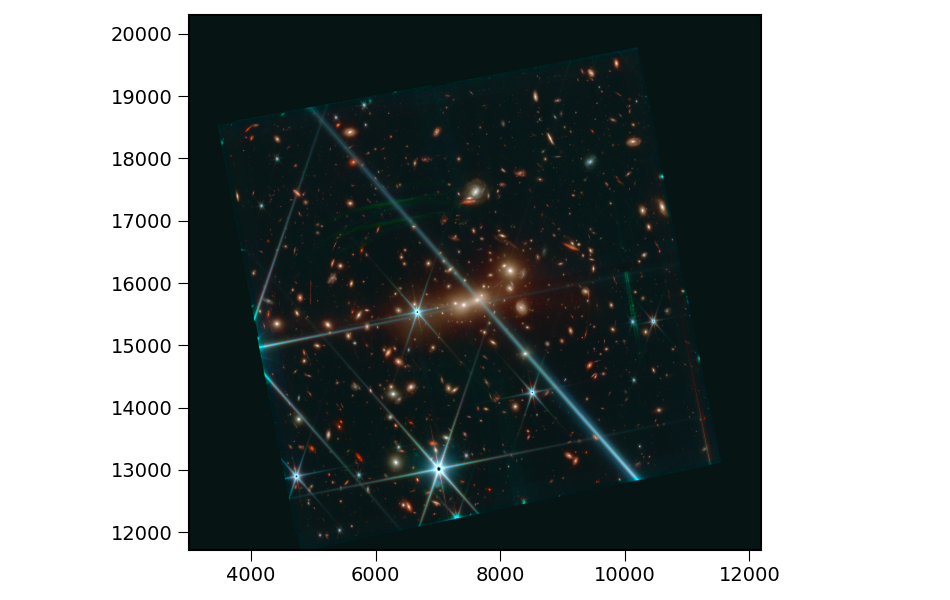

In [32]:
fig = plt.figure(figsize=(9.5, 9))
plt.imshow(color_image)

In [14]:
image_file = '/Users/dcoe/macs0647/images/20mas/macs0647-grizli-v4.0-f200w-clear_drc_sci.fits'
hdu = fits.open(image_file)
idata = 0
image_wcs = wcs.WCS(hdu[idata].header, hdu)
image_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 101.9482378  70.2297032  
CRPIX : 8191.5  12287.5  
CD1_1 CD1_2  : -5.5555555555555e-06  0.0  
CD2_1 CD2_2  : 0.0  5.5555555555555e-06  
NAXIS : 16384  24576

In [40]:
%matplotlib inline

In [50]:
catalog_file = os.path.join('../catalogs/', field + '_phot-eazy.ecsv')
catalog = astropy.io.ascii.read(catalog_file)
catalog[:2]

id,ra,dec,x,y,z_spec,f105w_flux,f105w_fluxerr,f110w_flux,f110w_fluxerr,f115w_flux,f115w_fluxerr,f125w_flux,f125w_fluxerr,f140w_flux,f140w_fluxerr,f150w_flux,f150w_fluxerr,f160w_flux,f160w_fluxerr,f200w_flux,f200w_fluxerr,f275wu_flux,f275wu_fluxerr,f277w_flux,f277w_fluxerr,f336wu_flux,f336wu_fluxerr,f356w_flux,f356w_fluxerr,f390wu_flux,f390wu_fluxerr,f435w_flux,f435w_fluxerr,f444w_flux,f444w_fluxerr,f475w_flux,f475w_fluxerr,f555w_flux,f555w_fluxerr,f606w_flux,f606w_fluxerr,f625w_flux,f625w_fluxerr,f775w_flux,f775w_fluxerr,f814w_flux,f814w_fluxerr,f850lp_flux,f850lp_fluxerr,nusefilt,z_ml,z_ml_chi2,z_ml_risk,lc_min,lc_max,z_phot,z_phot_chi2,z_phot_risk,z_min_risk,min_risk,z_raw_chi2,raw_chi2,z025,z160,z500,z840,z975,restU,restU_err,restB,restB_err,restV,restV_err,restJ,restJ_err,dL,mass,sfr,Lv,LIR,energy_abs,Lu,Lj,L1400,L2800,LHa,LOIII,LHb,LOII,MLv,Av,lwAgeV,mass_p,sfr_p,Lv_p,LIR_p,energy_abs_p,Lu_p,Lj_p,L1400_p,L2800_p,LHa_p,LOIII_p,LHb_p,LOII_p,Av_p,ssfr_p,rest120,rest120_err,rest121,rest121_err,rest156,rest156_err,rest157,rest157_err,rest158,rest158_err,rest159,rest159_err,rest160,rest160_err,rest414,rest414_err,rest415,rest415_err,rest416,rest416_err
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc,solMass,solMass / yr,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solLum,solMass / solLum,,Gyr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int32,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float64[5],float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1,102.015220,70.161446,4098.274752800464,1.999824071826548,-1.0,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,-99.000,0,-1.0,-1.0,-1.0,27082581599519.1,0.0,-1.0,-1.0,-1.0,0.01,0.0,0.01,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,0.0e+00,-9.00e+29,-900000000000000046043660025856.000,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-9.00e+29,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.000 .. -900000000000000046043660025856.000,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-9.00e+29 .. -9.00e+29,-900000000000000046043660025856.00 .. -900000000000000046043660025856.00,-9.00e+29 .. -9.00e+29,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000,-99.000,0.000
2,101.948789,70.161459,8156.305414383205,1.9979236794378306,-1.0,-99.000,-99.000,-99.000,-99.

In [47]:
JD_ids = {'JD1':3593, 'JD2':3349, 'JD3':4871, 'JD1c':3621, 'JD2c':3314, 'JD3c':4858}

In [58]:
# https://docs.astropy.org/en/stable/visualization/wcsaxes/overlays.html
# between plot and labels
#ax.set_autoscale_on(False)  # freeze all motor functions

In [44]:
#xlo, xhi = 4000, 11000
#ylo, yhi = 13000, 19000

# Let's show the whole thing
xlo, xhi =  3400, 11600
ylo, yhi = 11700, 19800
extent = xlo, xhi, ylo, yhi
xslice = slice(xlo, xhi)
yslice = slice(ylo, yhi)
slices = yslice, xslice

3593 JD1 6119.464027522941 14730.832901908758
3349 JD2 6784.956753880039 14088.507741404703
4871 JD3 6191.254397896685 17846.216150442546
3621 JD1c 6086.935622186238 14835.804505010045
3314 JD2c 6874.3416919268975 14029.643059362914
4858 JD3c 6228.308913219006 17820.506759611588


/Users/dcoe/miniconda3/envs/erophot/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


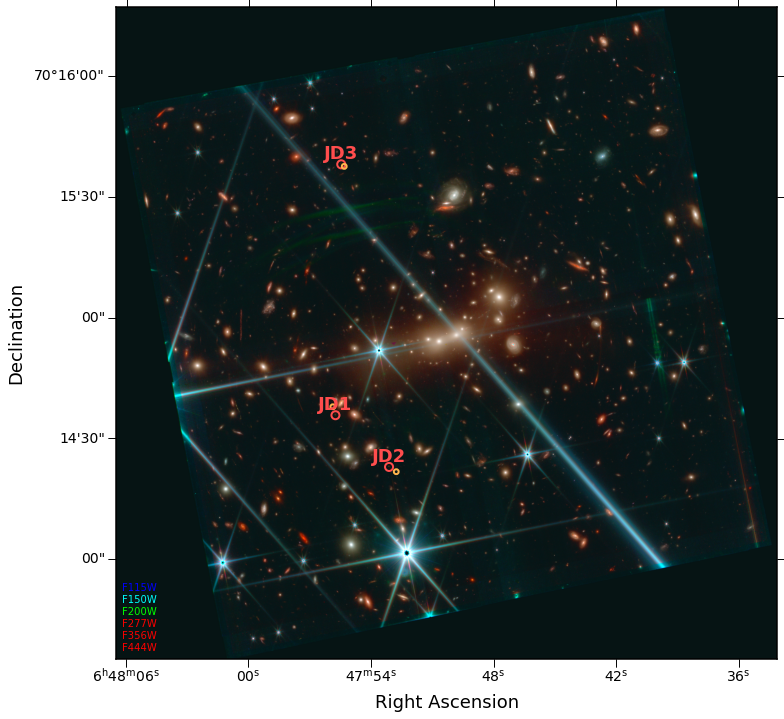

In [97]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=image_wcs) # , sharex=True, sharey=True)
plt.imshow(color_image[slices], extent=extent)#, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
#plt.xlim(xlo, xhi)
#plt.ylim(ylo, yhi)

#plt.text(xlo, xhi, 'TEST', fontsize=80, color='r');
#plt.text(6000, 15000, 'TEST', fontsize=80, color='r');

ax.set_aspect( 1 ) 
    
for label in 'JD1 JD2 JD3'.split():
    id = JD_ids[label]
    obj = extract_id(catalog, id)
    x = obj['x']
    y = obj['y']
    print(id, label, x, y)
    r = 50
    dx = 0
    dy = r + 20
    color = 1, 0.3, 0.3
    plt.text(x+dx, y+dy, label, fontsize=18, color=color, ha='center', fontweight='semibold')
    cc = plt.Circle((x, y), r, fill=False, ec=color, lw=2)
    ax.add_artist( cc )
    
for label in 'JD1c JD2c JD3c'.split():
    id = JD_ids[label]
    obj = extract_id(catalog, id)
    x = obj['x']
    y = obj['y']
    print(id, label, x, y)
    r = 30
    dx = 0
    dy = r + 20
    color = 1, 0.7, 0.3
    #plt.text(x+dx, y+dy, label, fontsize=18, color=color, ha='center', fontweight='semibold')
    cc = plt.Circle((x, y), r, fill=False, ec=color, lw=2)
    ax.add_artist( cc )
    
filters = 'F115W F150W F200W F277W F356W F444W'.split()

filter_colors = {}     # R, G, B
filter_colors['f115w'] = 0, 0, 1
filter_colors['f150w'] = 0, 1, 1
filter_colors['f200w'] = 0, 1, 0
filter_colors['f277w'] = 1, 0, 0
filter_colors['f356w'] = 1, 0, 0
filter_colors['f444w'] = 1, 0, 0

x = xlo + 70
y = ylo + 850
for filt in filters:
    color = filter_colors[filt.lower()]
    plt.text(x, y, filt, fontsize=10, color=color)
    y -= 150

In [98]:
#fig.savefig('MACS0647_JWST.pdf', bbox_inches='tight', dpi=800)  # takes a minute; dpi 800 -> 85MB file!
#fig.savefig('MACS0647_JWST.pdf', bbox_inches='tight', dpi=200)  # dpi 200 -> 5MB file
fig.savefig('MACS0647_JWST.pdf', bbox_inches='tight', dpi=100)  # dpi 100 -> 1MB file